In [41]:
import pandas as pd
import numpy as np

input_path = 'dataset/v4_cleaned_dataset.csv'
input_csv = pd.read_csv(input_path)

train = input_csv.drop(columns='sii')
y = input_csv['sii']

train.shape, y.shape

((520, 75), (520,))

In [42]:
train.head()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,...,PAQ_C-Season_Summer,PAQ_C-Season_Winter,SDS-Season_Fall,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Winter,PreInt_EduHx-Season_Fall,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter
0,9.0,0.0,71.0,18.292347,56.0,81.6,60.0,97.0,117.0,18.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,14.0,0.0,68.0,17.168636,66.5,108.0,60.0,71.0,129.0,16.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,12.0,0.0,58.0,34.187282,60.5,178.0,67.0,81.0,119.0,8.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,12.0,1.0,77.0,19.751301,62.0,108.0,55.0,60.0,98.0,30.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,12.0,1.0,85.0,15.016020,53.0,60.0,64.0,74.0,117.0,28.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


 - Primo modello basilare: Random Forest

In [43]:
# import libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [44]:
#variable initialization
acc   = []
score = []

lower_bound = 20
upper_bound = 100
cross_valid = 4

In [45]:
#parameter tuning (number of trees) and model training
last_acc = 0
best_trees = 0

X_train, X_val, y_train, y_val = train_test_split(train, y, test_size=0.25, random_state=0)

for t in range(lower_bound, upper_bound):
    model = RandomForestClassifier(n_estimators=t, bootstrap=False)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc.append(accuracy_score(y_val, y_pred))
    score.append(cross_val_score(model, train, y, cv=cross_valid).mean())

    if acc[-1] > last_acc:
        last_acc = acc[-1]
        best_trees = t
    
    print ("t: {:2d} | Accuracy {:.3f}".format(t,acc[-1]), " | Cross validation score {:.3f}".format(score[-1]))

t: 20 | Accuracy 0.523  | Cross validation score 0.567
t: 21 | Accuracy 0.554  | Cross validation score 0.567
t: 22 | Accuracy 0.562  | Cross validation score 0.575
t: 23 | Accuracy 0.562  | Cross validation score 0.587
t: 24 | Accuracy 0.546  | Cross validation score 0.560
t: 25 | Accuracy 0.531  | Cross validation score 0.560
t: 26 | Accuracy 0.562  | Cross validation score 0.565
t: 27 | Accuracy 0.585  | Cross validation score 0.562
t: 28 | Accuracy 0.523  | Cross validation score 0.565
t: 29 | Accuracy 0.485  | Cross validation score 0.558
t: 30 | Accuracy 0.554  | Cross validation score 0.558
t: 31 | Accuracy 0.546  | Cross validation score 0.548
t: 32 | Accuracy 0.538  | Cross validation score 0.581
t: 33 | Accuracy 0.515  | Cross validation score 0.560
t: 34 | Accuracy 0.538  | Cross validation score 0.573
t: 35 | Accuracy 0.523  | Cross validation score 0.575
t: 36 | Accuracy 0.531  | Cross validation score 0.573
t: 37 | Accuracy 0.554  | Cross validation score 0.567
t: 38 | Ac

In [46]:
def result_analysis(accuracy, val_score):
    best_acc         = max(accuracy)     
    best_score       = max(val_score)    
    return best_acc, best_score


#print("Best accuracy: ", best_acc, "with n_estimators = ", best_acc_param) 
#print("Best score: ",  max(score), "with n_estimators = ", best_score_param)

In [47]:
results = result_analysis(acc, score)
print("Best accuracy: ", results[0], "with n_estimators = ", best_trees) 
print("Best score: ",  results[1])

Best accuracy:  0.5846153846153846 with n_estimators =  27
Best score:  0.6038461538461538


 - Dai risultati di questo modello basilare procedo ad effettuare migliorie. Mi ricavo la feature importance e droppo le feature meno importanti per la mia classificazione

Feature Importance:  [np.float64(0.03869984995631723), np.float64(0.03731281593815268), np.float64(0.03718038072822195), np.float64(0.03655203896624823), np.float64(0.03264274930189705), np.float64(0.03244230133326213), np.float64(0.02949040821696344), np.float64(0.02938134602915681), np.float64(0.029369575461795555), np.float64(0.028623996870457316), np.float64(0.028083492477629222), np.float64(0.027825369830200238), np.float64(0.02758550330240781), np.float64(0.02713602643231299), np.float64(0.02689334175764515), np.float64(0.026365576930230766), np.float64(0.025993098651847135), np.float64(0.025645061767862354), np.float64(0.02555520103898271), np.float64(0.0254146843111878), np.float64(0.025010089317709854), np.float64(0.024561669279887503), np.float64(0.024490943366852473), np.float64(0.024180749785431027), np.float64(0.02400322133623544), np.float64(0.023224816230492756), np.float64(0.022765206823904583), np.float64(0.022500181381225615), np.float64(0.021108161702478957), np.floa

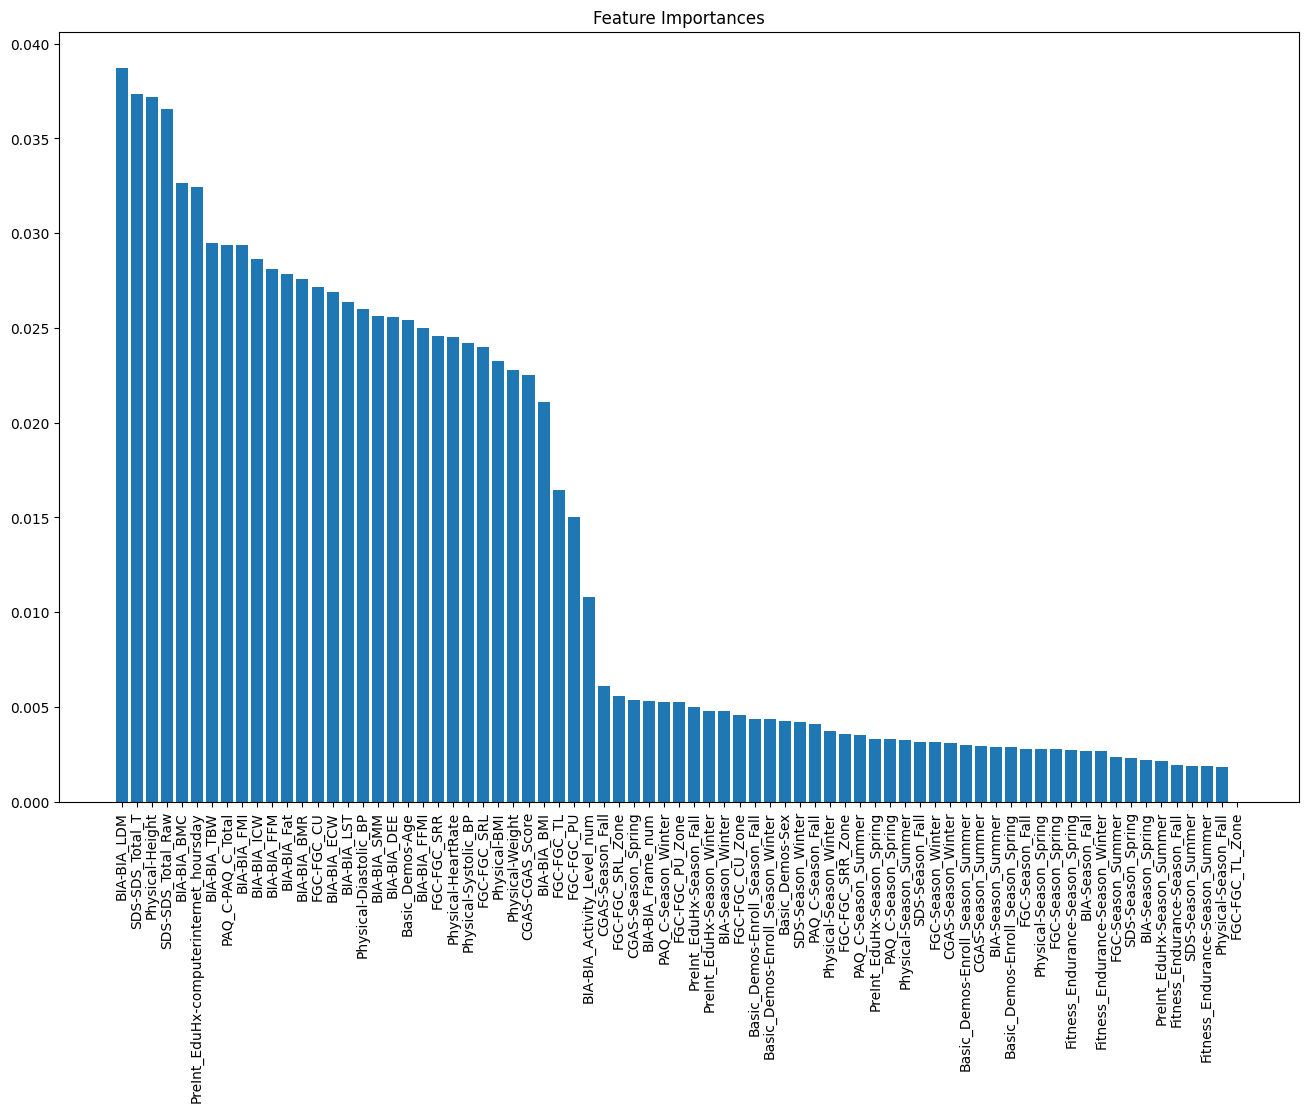

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

print("Feature Importance: ", sorted(model.feature_importances_)[::-1])

fig, ax = plt.subplots(figsize=(16, 10))
ax.bar(range(0, X_train.shape[1]), sorted(model.feature_importances_)[::-1])
ax.set_title("Feature Importances")
ax.set_xticks(range(X_train.shape[1]))
ax.set_xticklabels(X_train.columns[np.argsort(model.feature_importances_)[::-1]], rotation=90)
plt.show()

In [49]:
#drop the least important features
from sklearn.feature_selection import RFECV

rf_small = RandomForestClassifier(n_estimators=best_trees)

selector = RFECV(rf_small, step=1, cv=cross_valid,
                 scoring='accuracy',        # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
                 min_features_to_select=1)

selector.fit(X_train,y_train);

c:\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


In [50]:
print (f"Number of selected features: {selector.n_features_}")
print (f"Selected features: {X_train.columns[selector.support_]}")

Number of selected features: 63
Selected features: Index(['Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-CGAS_Score', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Diastolic_BP',
       'Physical-HeartRate', 'Physical-Systolic_BP', 'FGC-FGC_CU',
       'FGC-FGC_CU_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL',
       'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
       'BIA-BIA_TBW', 'PAQ_C-PAQ_C_Total', 'SDS-SDS_Total_Raw',
       'SDS-SDS_Total_T', 'PreInt_EduHx-computerinternet_hoursday',
       'Basic_Demos-Enroll_Season_Fall', 'Basic_Demos-Enroll_Season_Spring',
       'Basic_Demos-Enroll_Season_Summer', 'Basic_Demos-Enroll_Season_Winter',
       'CGAS-Season

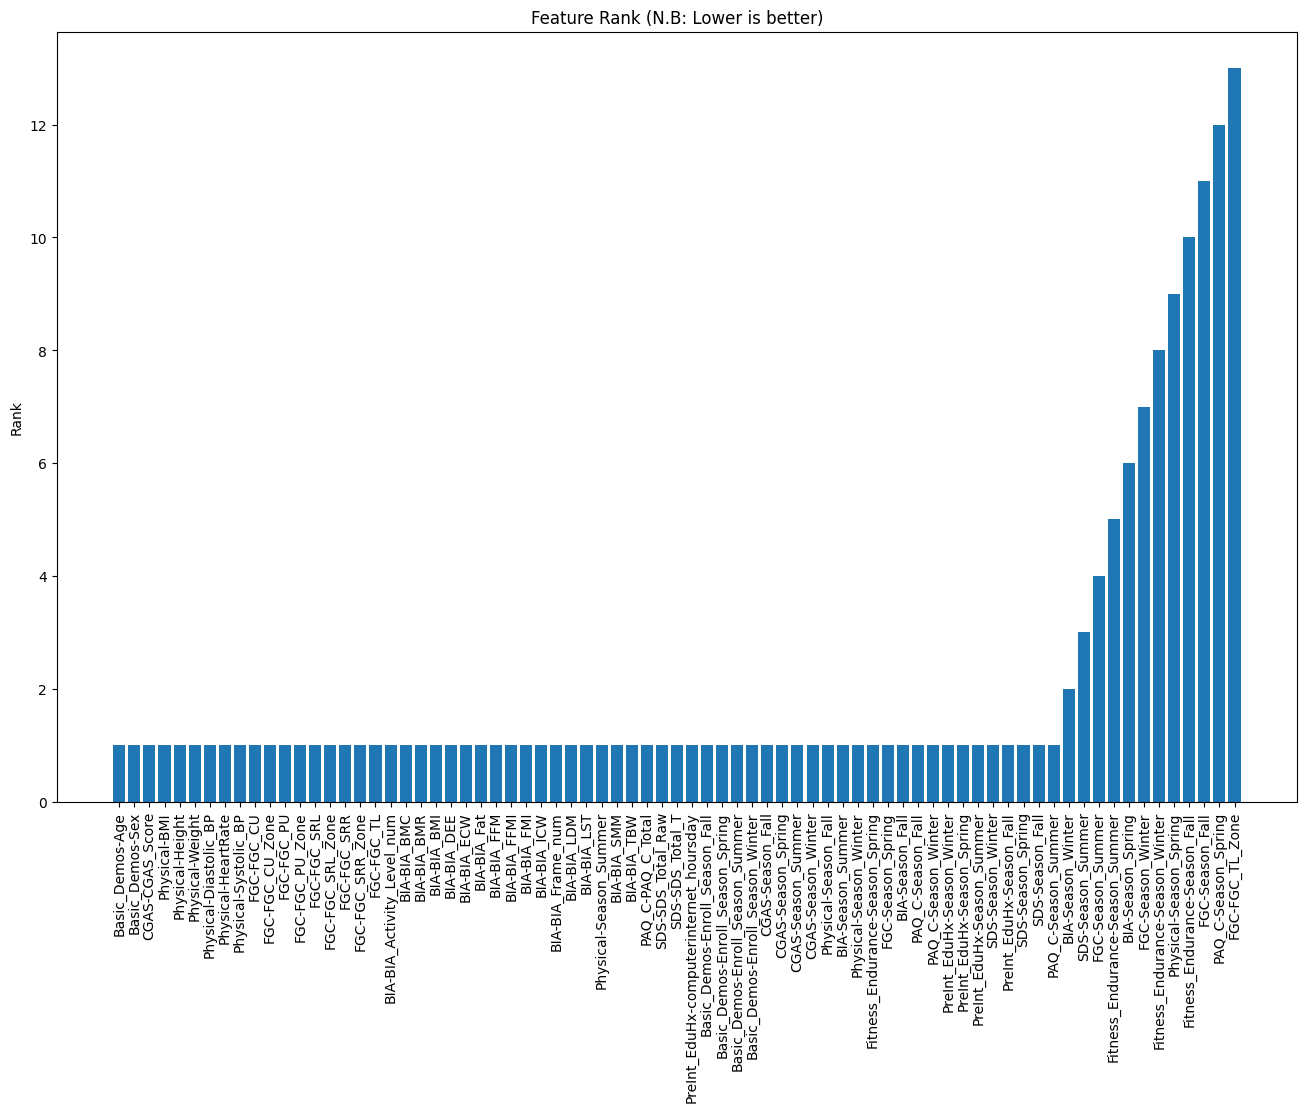

In [51]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.bar(range(0, X_train.shape[1]), sorted(selector.ranking_))
ax.set_title("Feature Rank (N.B: Lower is better)")
ax.set_xticks(range(X_train.shape[1]))
ax.set_xticklabels(X_train.columns[np.argsort(selector.ranking_)], rotation=90)
ax.set_ylabel("Rank")
plt.show()

 - Creo un nuovo dataset che uso poi per la creazione del modello

In [52]:
smaller_train = train[X_train.columns[selector.support_]]
smaller_train.head()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,...,PAQ_C-Season_Fall,PAQ_C-Season_Summer,PAQ_C-Season_Winter,SDS-Season_Fall,SDS-Season_Spring,SDS-Season_Winter,PreInt_EduHx-Season_Fall,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter
0,9.0,0.0,71.0,18.292347,56.0,81.6,60.0,97.0,117.0,18.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,14.0,0.0,68.0,17.168636,66.5,108.0,60.0,71.0,129.0,16.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,12.0,0.0,58.0,34.187282,60.5,178.0,67.0,81.0,119.0,8.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,12.0,1.0,77.0,19.751301,62.0,108.0,55.0,60.0,98.0,30.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,12.0,1.0,85.0,15.016020,53.0,60.0,64.0,74.0,117.0,28.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


 - Ridotto ora il numero di features, tento ora un nuovo stimatore con gli stessi parametri (already tuned) e agisco attivando _bootstrap_

In [53]:
# variable initialization
acc_v2   = []
score_v2 = []

In [54]:
# retrain the model with the smaller dataset and bootstrap enabled
X_train, X_val, y_train, y_val = train_test_split(smaller_train, y, test_size=0.25, random_state=0)
last_acc = 0
best_trees = 0


for t in range(lower_bound, upper_bound):
    model = RandomForestClassifier(n_estimators=t, bootstrap=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc_v2.append(accuracy_score(y_val, y_pred))
    score_v2.append(cross_val_score(model, smaller_train, y, cv=cross_valid).mean())
    
    if acc_v2[-1] > last_acc:
        last_acc = acc_v2[-1]
        best_trees = t
        
    print ("t: {:2d} | Accuracy {:.3f}".format(t,acc[-1]), " | Cross validation score {:.3f}".format(score[-1]))

t: 20 | Accuracy 0.531  | Cross validation score 0.575
t: 21 | Accuracy 0.531  | Cross validation score 0.575
t: 22 | Accuracy 0.531  | Cross validation score 0.575
t: 23 | Accuracy 0.531  | Cross validation score 0.575
t: 24 | Accuracy 0.531  | Cross validation score 0.575
t: 25 | Accuracy 0.531  | Cross validation score 0.575
t: 26 | Accuracy 0.531  | Cross validation score 0.575
t: 27 | Accuracy 0.531  | Cross validation score 0.575
t: 28 | Accuracy 0.531  | Cross validation score 0.575
t: 29 | Accuracy 0.531  | Cross validation score 0.575
t: 30 | Accuracy 0.531  | Cross validation score 0.575
t: 31 | Accuracy 0.531  | Cross validation score 0.575
t: 32 | Accuracy 0.531  | Cross validation score 0.575
t: 33 | Accuracy 0.531  | Cross validation score 0.575
t: 34 | Accuracy 0.531  | Cross validation score 0.575
t: 35 | Accuracy 0.531  | Cross validation score 0.575
t: 36 | Accuracy 0.531  | Cross validation score 0.575
t: 37 | Accuracy 0.531  | Cross validation score 0.575
t: 38 | Ac

In [55]:
results = result_analysis(acc, score)
print("Best accuracy: ", results[0], "with n_estimators = ", best_trees) 
print("Best score: ",  results[1])

Best accuracy:  0.5846153846153846 with n_estimators =  27
Best score:  0.6038461538461538


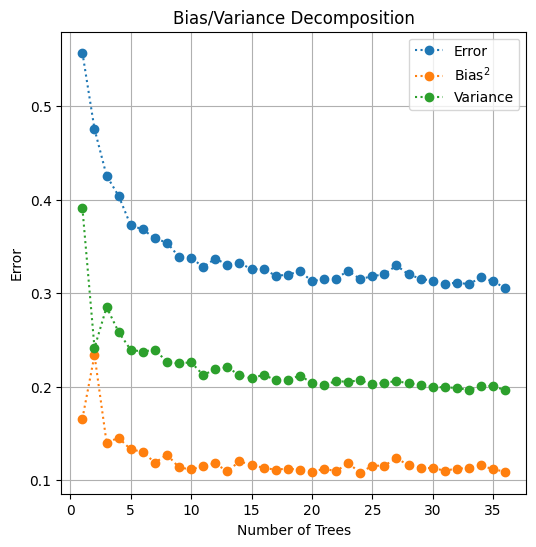

In [56]:
from sklearn.utils import resample

N_TESTS = 50
stats = np.array([])
top_classification_range = range(1, best_trees + 10)


for t in top_classification_range:
    y_preds = np.array([])
    for i in range(N_TESTS):
        X_resampled, y_resampled = resample(X_train, y_train, n_samples=int(0.8*len(y_train)) )
        model_rf = RandomForestClassifier(n_estimators=t)
        model_rf.fit(X_resampled, y_resampled)
        y_pred = model_rf.predict(X_train)
        y_preds = np.column_stack( [y_preds, y_pred] ) if y_preds.size else y_pred

    dt_bias     = (y_train-np.mean(y_preds,axis=1))**2
    dt_variance = np.var(y_preds,axis=1)
    dt_error    = (y_preds - y_train.to_numpy().reshape(-1, 1))**2 #i need the reshape to make it a column vector. To use the 'reshape()' method
                                                                #i need the object to be a numpy array. Actually it is a Pandas Series so i convert it 

    run_stats = np.array([dt_error.mean(), dt_bias.mean(), dt_variance.mean()])
    stats = np.column_stack([stats, run_stats]) if stats.size else run_stats

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(top_classification_range, stats[0,:], 'o:', label='Error')
ax.plot(top_classification_range, stats[1,:], 'o:', label='Bias$^2$')
ax.plot(top_classification_range, stats[2,:], 'o:', label='Variance')
ax.set_title("Bias/Variance Decomposition")
ax.set_xlabel('Number of Trees')
ax.set_ylabel('Error')
ax.grid()
ax.legend()

Al crescere degli alberi della mia Random Forest l'errore totale si stabilizza intorno ai 15 alberi completi, anche allenando un maggior numero di alberi, la varianza nello specifico sembra rimanere pressoché, di conseguenza l'errore totale. 
Poiché allenare un numero spropositato di alberi non risulta essera la scelta corretta per aumentare l'accuracy di questo modello, proseguo in altro modo:

Disponendo di molte features ma di poche classi: _sii_ ammette valori rispettivamente uguali a:
 - 0;
 - 1;
 - 2;
 - 3;
 
Decido di lavorare concentrandomi su un compromesso tra completezza degli alberi e profondità della random forest. Eseguo quindi il tuning di altri parametri del mio modello

In [57]:
train.head()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,...,PAQ_C-Season_Summer,PAQ_C-Season_Winter,SDS-Season_Fall,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Winter,PreInt_EduHx-Season_Fall,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter
0,9.0,0.0,71.0,18.292347,56.0,81.6,60.0,97.0,117.0,18.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,14.0,0.0,68.0,17.168636,66.5,108.0,60.0,71.0,129.0,16.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,12.0,0.0,58.0,34.187282,60.5,178.0,67.0,81.0,119.0,8.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,12.0,1.0,77.0,19.751301,62.0,108.0,55.0,60.0,98.0,30.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,12.0,1.0,85.0,15.016020,53.0,60.0,64.0,74.0,117.0,28.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 75 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         520 non-null    float64
 1   Basic_Demos-Sex                         520 non-null    float64
 2   CGAS-CGAS_Score                         520 non-null    float64
 3   Physical-BMI                            520 non-null    float64
 4   Physical-Height                         520 non-null    float64
 5   Physical-Weight                         520 non-null    float64
 6   Physical-Diastolic_BP                   520 non-null    float64
 7   Physical-HeartRate                      520 non-null    float64
 8   Physical-Systolic_BP                    520 non-null    float64
 9   FGC-FGC_CU                              520 non-null    float64
 10  FGC-FGC_CU_Zone                         520 non-null    float6

In [59]:
#variable initialization
acc   = []
score = []
lower_depth = 1
upper_depth = 60
cross_valid = 4

In [60]:
X_train, X_val, y_train, y_val = train_test_split(train, y, test_size=0.25, random_state=0)

In [61]:
last_acc = 0
best_depth = 0

for t in range (lower_depth, upper_depth):
    model = RandomForestClassifier(max_depth=t)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc.append(accuracy_score(y_val, y_pred))
    score.append(cross_val_score(model, train, y, cv=cross_valid).mean())

    if acc[-1] > last_acc:
        last_acc = acc[-1]
        best_depth = t

    print ("t: {:2d} | Accuracy {:.3f}".format(t,acc[-1]), " | Cross validation score {:.3f}".format(score[-1]))

t:  1 | Accuracy 0.531  | Cross validation score 0.567
t:  2 | Accuracy 0.592  | Cross validation score 0.575
t:  3 | Accuracy 0.577  | Cross validation score 0.577
t:  4 | Accuracy 0.538  | Cross validation score 0.571
t:  5 | Accuracy 0.546  | Cross validation score 0.579
t:  6 | Accuracy 0.569  | Cross validation score 0.577
t:  7 | Accuracy 0.538  | Cross validation score 0.581
t:  8 | Accuracy 0.546  | Cross validation score 0.562
t:  9 | Accuracy 0.546  | Cross validation score 0.573
t: 10 | Accuracy 0.546  | Cross validation score 0.585
t: 11 | Accuracy 0.523  | Cross validation score 0.581
t: 12 | Accuracy 0.554  | Cross validation score 0.587
t: 13 | Accuracy 0.546  | Cross validation score 0.587
t: 14 | Accuracy 0.538  | Cross validation score 0.587
t: 15 | Accuracy 0.515  | Cross validation score 0.573
t: 16 | Accuracy 0.554  | Cross validation score 0.571
t: 17 | Accuracy 0.531  | Cross validation score 0.565
t: 18 | Accuracy 0.562  | Cross validation score 0.573
t: 19 | Ac

In [62]:
results = result_analysis(acc, score)
print("Best accuracy: ", results[0], "with max_depth = ", best_depth)
print("Best score: ",  results[1])

Best accuracy:  0.5923076923076923 with max_depth =  2
Best score:  0.5903846153846154


**Considerazioni:**

- Usando il *cleaned_data_export* dal file *data_cleaning*, nonostante il processo di paramether tuning non andiamo oltre i 0.60 di _accuracy_ e 0.59 di _cross validation score_. I dati variano all'incirca attorno a questi valori per ogni esecuzione svolta

- Usando il *v4_cleaned_dataset* dal file *data_cleaning_v4*, svolgendo lo stesso processo di paramether tuning notiamo un aumento stabile dell'_accuracy_ che, in ogni esecuzione svolta arriva attorno ai 0.64 circa, lasciando indietro il _cross validation score_ che rimane stabile attorno ai 0.59

In [64]:
""" That's stupid: 560h of training time
for d in range(lower_depth, upper_depth):
    for t in range(lower_bound, upper_bound):
        model = RandomForestClassifier(max_depth=d, n_estimators=t)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        acc.append(accuracy_score(y_val, y_pred))
        score.append(cross_val_score(model, train, y, cv=cross_valid).mean())

        if acc[-1] > last_acc:
            last_acc = acc[-1]
            best_depth_v2 = d
            best_trees_v2 = t """

" That's stupid: 560h of training time\nfor d in range(lower_depth, upper_depth):\n    for t in range(lower_bound, upper_bound):\n        model = RandomForestClassifier(max_depth=d, n_estimators=t)\n        model.fit(X_train, y_train)\n        y_pred = model.predict(X_val)\n        acc.append(accuracy_score(y_val, y_pred))\n        score.append(cross_val_score(model, train, y, cv=cross_valid).mean())\n\n        if acc[-1] > last_acc:\n            last_acc = acc[-1]\n            best_depth_v2 = d\n            best_trees_v2 = t "

In [65]:
results = result_analysis(acc, score)
print("Best accuracy: ", results[0], "with max_depth = ", best_depth_v2, "and n_estimators = ", best_trees_v2)
print("Best score: ",  results[1])

Best accuracy:  0.5923076923076923 with max_depth =  0 and n_estimators =  0
Best score:  0.5903846153846154


Nonostante lo sforzo nel migliorare i parametri per aumentare i punteggi di accuracy e validation score, non è possibile alzarli oltre il 0.6;
 
Agisco quindi diversamente tramite ulteriore pulizia dei dati che avviene nel file _data-cleaning-v2.ipynb_
 